## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Import LMO detailed sheet and adjust the column NAICS.

## Read the data files in Python

In [2]:
# Read the Lmo detailed file containing codes of industries
lmo = pd.read_csv(r'C:\Users\Mairaj-PC\Desktop\LMO_Detailed_Industries_by_NAICS.csv')
lmo.shape

(59, 2)

In [3]:
# Replace & with ,
lmo['NAICS'] = lmo.NAICS.str.replace('&', ',')
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


### Step 2: Read all categories of RTRA files.

In [4]:
# Now load the RTRA files
# create the function to import these file

def imported_data(data_file, data_to_saved):
    """""
    Args:
    
    data_file : dataframe to import data
    data_saved : new dataframe in which we save and combined same categories of dataframe
    
    Output:
    
    Combined dataframe for each category
    """""
    for file in data_file:
        df = pd.read_csv(file)
        data_to_saved = data_to_saved.append(df, ignore_index = True)
    return data_to_saved

In [5]:
# import the 2 digit NAICS files
data_2NAICS = pd.DataFrame()
list_2NAICS = [r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_2NAICS_97_99.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_2NAICS_00_05.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_2NAICS_06_10.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_2NAICS_11_15.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_2NAICS_16_20.csv'
              ]
data_2NAICS = imported_data(list_2NAICS, data_2NAICS)
data_2NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


In [6]:
# import the 3 digit NAICS files
data_3NAICS = pd.DataFrame()
list_3NAICS = [r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_97_99.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_00_05.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_06_10.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_11_15.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_3NAICS_16_20.csv'
              ]
data_3NAICS = imported_data(list_3NAICS, data_3NAICS)
data_3NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


In [7]:
# import the 4 digit NAICS files
data_4NAICS = pd.DataFrame()
list_4NAICS = [r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_4NAICS_97_99.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_4NAICS_00_05.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_4NAICS_06_10.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_4NAICS_11_15.csv',
               r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\RTRA_Employ_4NAICS_16_20.csv'
              ]
data_4NAICS = imported_data(list_4NAICS, data_4NAICS)
data_4NAICS = data_4NAICS.rename({'NAICS':'NAICS_CODE'}, axis = 1)
data_4NAICS['NAICS_CODE'] = data_4NAICS['NAICS_CODE'].astype(str)

data_4NAICS.head()

,SYEAR,SMTH,NAICS_CODE,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


### Step 3: Align and break the column to make data reliable.

In [8]:
# Now break the two digit NAICS column and separte string and numbers

# first start with 2 digit
df = pd.DataFrame(data_2NAICS['NAICS'].astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
df['NAICS_CODE']= df['NAICS_CODE'].astype('str').str.strip(']').str.replace('-',',')
data_2NAICS['NAICS']= df['NAICS']
data_2NAICS['NAICS_CODE']= df['NAICS_CODE']
data_2NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Accommodation and food services,129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11
3,1997,1,"Arts, entertainment and recreation",38750,71
4,1997,1,Construction,118000,23


In [9]:
# for three digit we use,
new_df = pd.DataFrame(data_3NAICS['NAICS'].astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
new_df['NAICS_CODE']= new_df['NAICS_CODE'].astype('str').str.strip(']').str.replace('-',',')
data_3NAICS['NAICS']= new_df['NAICS']
data_3NAICS['NAICS_CODE']= new_df['NAICS_CODE']
data_3NAICS.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Aboriginal public administration,500,914
1,1997,1,Accommodation services,24000,721
2,1997,1,Administrative and support services,56750,561
3,1997,1,Air transportation,17000,481
4,1997,1,Ambulatory health care services,40000,621


### Step 4: Combined month and year column to make a date.

In [10]:
# now combine the SYEAR and SMONTH column in one
def date_column(df):
    df['Date'] = pd.to_datetime(df['SYEAR'].astype('str') + df['SMTH'].astype('str'), format='%Y%m')
    df = df.sort_values('Date')
    df.drop(columns=['SYEAR', 'SMTH'], inplace=True)
    return df

In [11]:
# Now apply above function to 2 digit dataframe
data_2NAICS = date_column(data_2NAICS)
data_2NAICS.head()

,NAICS,_EMPLOYMENT_,NAICS_CODE,Date
0,Accommodation and food services,129250,72,1997-01-01
19,Wholesale trade,72000,41,1997-01-01
18,Utilities,9750,22,1997-01-01
17,Transportation and warehousing,107000,"48,49",1997-01-01
16,Retail trade,224000,"44,45",1997-01-01


In [12]:
# similarly for 3 and 4 digits dataframe
data_3NAICS = date_column(data_3NAICS)
data_4NAICS = date_column(data_4NAICS)

### Step 5: Merging the RTRA data frames with LMO detailed sheet and dropping the N/A rows, concatenate all data frames to construct a Combined data frame.

In [13]:
# Now create a function to merge the all categories files with lmo file and drop na rows
def merging(first_df):
    new_df = first_df.merge(lmo, left_on = 'NAICS_CODE', right_on = 'NAICS', how = 'left').drop(columns = ['NAICS_x', 'NAICS_y'], axis = 1)
    new_df = new_df.dropna()
    return new_df

In [14]:
# for 2 digit dataframe
new_2NAICS = merging(data_2NAICS)
new_2NAICS

,_EMPLOYMENT_,NAICS_CODE,Date,LMO_Detailed_Industry
1,72000,41,1997-01-01,Wholesale trade
2,9750,22,1997-01-01,Utilities
5,50750,53,1997-01-01,Real estate rental and leasing
7,89250,81,1997-01-01,"Repair, personal and non-profit services"
15,118000,23,1997-01-01,Construction
...,...,...,...,...
5453,0,81,2019-12-01,"Repair, personal and non-profit services"
5456,0,53,2019-12-01,Real estate rental and leasing
5461,0,23,2019-12-01,Construction
5469,0,22,2019-12-01,Utilities


In [15]:
# for 3 digit dataframe
new_3NAICS = merging(data_3NAICS)
new_3NAICS

,_EMPLOYMENT_,NAICS_CODE,Date,LMO_Detailed_Industry
3,11500,331,1997-01-01,Primary metal manufacturing
11,36500,912,1997-01-01,Provincial and territorial public administration
12,15250,711,1997-01-01,"Performing arts, spectator sports and related ..."
15,1750,211,1997-01-01,Oil and gas extraction
16,27250,623,1997-01-01,Nursing and residential care facilities
...,...,...,...,...
28131,0,113,2019-12-01,Forestry and logging
28133,0,722,2019-12-01,Food services and drinking places
28136,0,114,2019-12-01,"Fishing, hunting and trapping"
28137,0,911,2019-12-01,Federal government public administration


In [16]:
# for 4 digit datframe, we merge manually because it has arrange in different manner than other two dataframes
new_4NAICS = data_4NAICS.merge(lmo, left_on = 'NAICS_CODE', right_on = 'NAICS', how = 'left').drop('NAICS', axis = 1)
new_4NAICS = new_4NAICS.dropna()
new_4NAICS

,NAICS_CODE,_EMPLOYMENT_,Date,LMO_Detailed_Industry
127,5416,16250,1997-01-01,"Management, scientific and technical consultin..."
128,5415,18250,1997-01-01,Computer systems design and related services
130,5413,27000,1997-01-01,"Architectural, engineering and related services"
149,6113,16500,1997-01-01,Universities
150,6112,9000,1997-01-01,Community colleges
...,...,...,...,...
85391,5413,0,2019-12-01,"Architectural, engineering and related services"
85410,6113,0,2019-12-01,Universities
85411,6112,0,2019-12-01,Community colleges
85412,6111,0,2019-12-01,Elementary and secondary schools


In [17]:
# now concatenate all three dataframe to make one combined dataframe
combined_NAICS = pd.concat([new_2NAICS, new_3NAICS, new_4NAICS])
combined_NAICS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12696 entries, 1 to 85522
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _EMPLOYMENT_           12696 non-null  int64         
 1   NAICS_CODE             12696 non-null  object        
 2   Date                   12696 non-null  datetime64[ns]
 3   LMO_Detailed_Industry  12696 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 495.9+ KB


### Step 6: Read the main Output data template, merging it with a Combined data frame to produce the Final data frame which is used for further analysis.

In [18]:
# import the output data sheet
Output_data = pd.read_excel(r'C:\Users\Mairaj-PC\Desktop\A_NEWLY_HIRED_DATA_ANALYST\Data_Output_Template.xlsx')

In [19]:
Output_data.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [20]:
# first apply date_column function to combine year and month column
Output_data = date_column(Output_data)
Output_data.head()

,LMO_Detailed_Industry,Employment,Date
0,Accommodation services,NaN,1997-01-01
32,Other manufacturing,NaN,1997-01-01
33,Other retail trade (excluding cars and persona...,NaN,1997-01-01
34,Paper manufacturing,NaN,1997-01-01
35,"Performing arts, spectator sports and related ...",NaN,1997-01-01


In [21]:
# Now merge output_data with our made combined dataframe to fill the 'Employment' column
final_df = Output_data.merge(combined_NAICS, left_on=['Date','LMO_Detailed_Industry'], right_on=['Date','LMO_Detailed_Industry'], how='left').drop('Employment', axis = 1)

# Remove na rows
final_df = final_df.dropna()

# Rename _EMPLOYMENT_ column
final_df = final_df.rename({'_EMPLOYMENT_':'Employment'}, axis = 1)

# Also move Date column as first column of the dataframe
column_name = ['Date', 'LMO_Detailed_Industry', 'Employment', 'NAICS_CODE']
final_df = final_df.reindex(columns = column_name)
final_df

,Date,LMO_Detailed_Industry,Employment,NAICS_CODE
0,1997-01-01,Accommodation services,24000.0,721
3,1997-01-01,Paper manufacturing,21250.0,322
4,1997-01-01,"Performing arts, spectator sports and related ...",15250.0,711
6,1997-01-01,Primary metal manufacturing,11500.0,331
8,1997-01-01,Provincial and territorial public administration,36500.0,912
...,...,...,...,...
15569,2018-12-01,Insurance carriers and related activities,29750.0,524
15572,2018-12-01,Machinery manufacturing,11500.0,333
15573,2018-12-01,"Management, scientific and technical consultin...",23750.0,5416
15574,2018-12-01,Motion picture and sound recording industries,19750.0,512


### Step 7: Apply exploratory data analysis to find some interesting results with the Final data frame.

### 1) How much employment is available in all industries through the year?

In [22]:
final_df1 = final_df.groupby('LMO_Detailed_Industry')['Employment'].sum().sort_values(ascending = False)
final_df1.head()

LMO_Detailed_Industry
Construction                                45485000.0
Food services and drinking places           35033250.0
Repair, personal and non-profit services    26021250.0
Hospitals                                   22518250.0
Elementary and secondary schools            22085500.0
Name: Employment, dtype: float64

<AxesSubplot:xlabel='Employments', ylabel='Industries'>

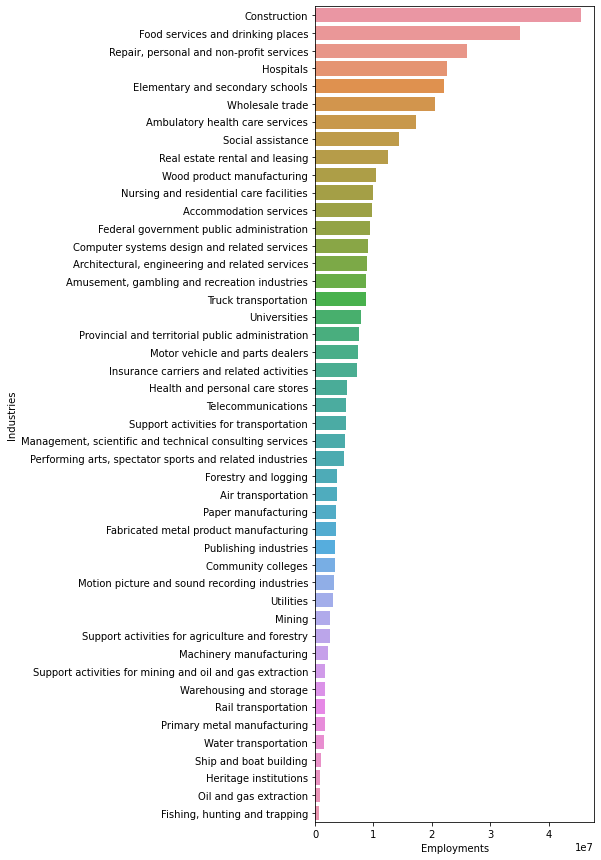

In [23]:
# lets explore with chart
new_df1 = pd.DataFrame({'Industries':final_df1.index, 'Employments':final_df1.values})
plt.figure(figsize=(5,15))
sns.barplot(x= 'Employments', y= 'Industries', data = new_df1)

### 2) Find some key statistical results from the top 3 industries?

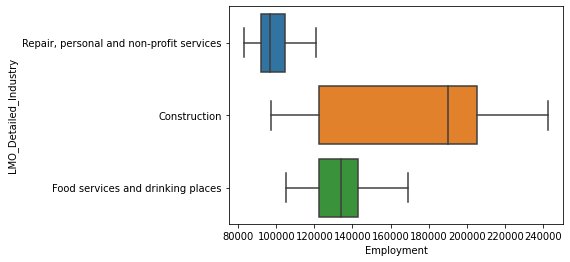

<Figure size 432x288 with 0 Axes>

In [24]:
top_3 = final_df[final_df['LMO_Detailed_Industry'].isin(['Construction', 'Food services and drinking places', 'Repair, personal and non-profit services'])]
top_3 = top_3[['LMO_Detailed_Industry', 'Employment']]

sns.boxplot(x = 'Employment', y = 'LMO_Detailed_Industry' , data = top_3)
plt.show()
plt.clf()

### 3) How the total employment grows over the period?

In [25]:
final_df3 = final_df.groupby('Date')['Employment'].mean()
final_df3

Date
1997-01-01    27255.434783
1997-02-01    27027.173913
1997-03-01    27369.565217
1997-04-01    27304.347826
1997-05-01    28168.478261
                  ...     
2018-08-01    38500.000000
2018-09-01    38858.695652
2018-10-01    38760.869565
2018-11-01    38798.913043
2018-12-01    38918.478261
Name: Employment, Length: 264, dtype: float64

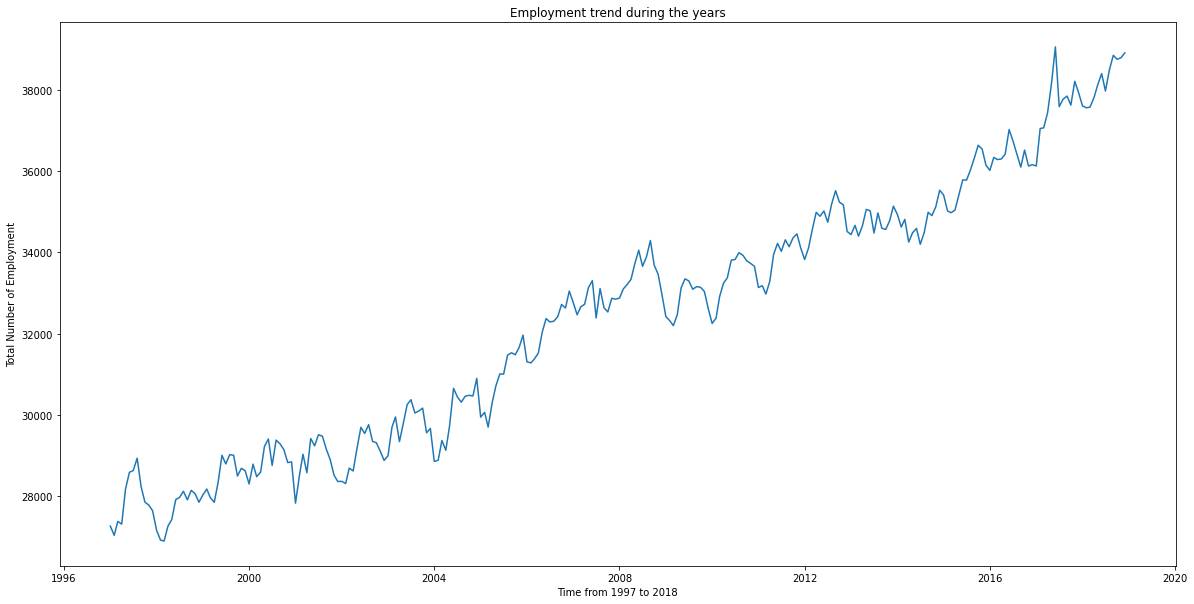

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(data = final_df3)
plt.xlabel('Time from 1997 to 2018')
plt.ylabel('Total Number of Employment')
plt.title('Employment trend during the years')
plt.show()

### The global crises was present from December 2007 to June 2009
### 4) How employment affect on the period of crisis ?

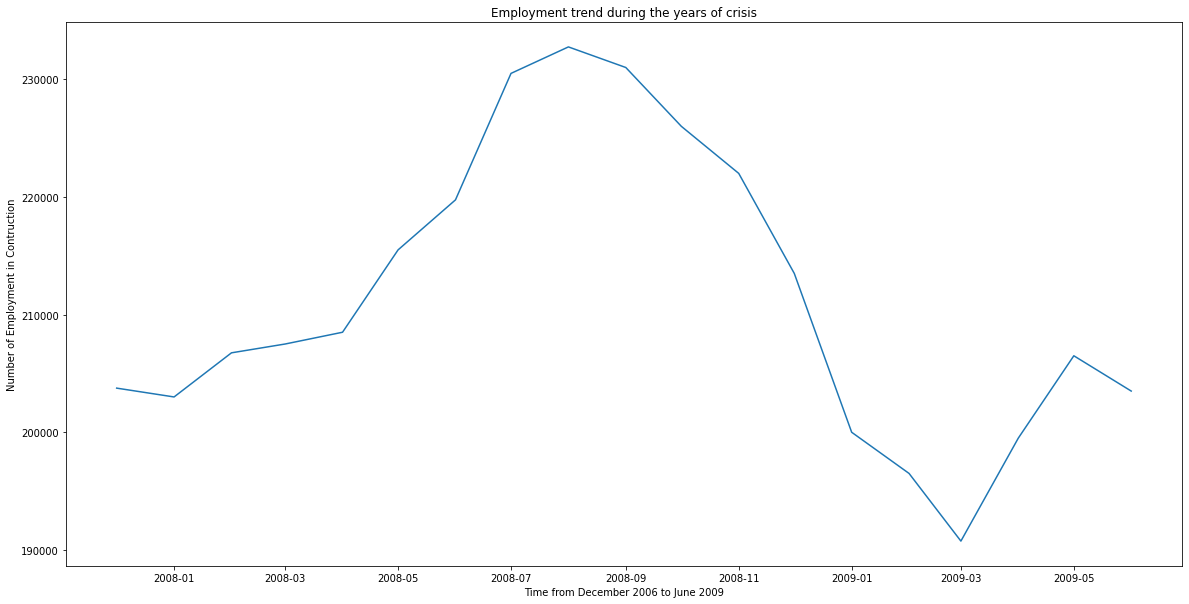

In [27]:
# we saw the trend during the crisis that how it affect the employment (Check with highest category construction)
year_06_10 = final_df[(final_df.Date >= '2007-12-01') & (final_df.Date < '2009-06-30') & (final_df['LMO_Detailed_Industry'] == 'Construction')]

final_df4 = year_06_10.groupby('Date')['Employment'].sum()

plt.figure(figsize=(20,10))
sns.lineplot(data = final_df4)
plt.xlabel('Time from December 2006 to June 2009')
plt.ylabel('Number of Employment in Contruction')
plt.title('Employment trend during the years of crisis')
plt.show()

## We have employement data upto 22 years,
## Now find the most effective year that creates highest number of employment

In [28]:
final_df5 = final_df
final_df5['YEAR'] = pd.DatetimeIndex(final_df5['Date']).year
final_df5[['YEAR', 'LMO_Detailed_Industry', 'Employment']]

,YEAR,LMO_Detailed_Industry,Employment
0,1997,Accommodation services,24000.0
3,1997,Paper manufacturing,21250.0
4,1997,"Performing arts, spectator sports and related ...",15250.0
6,1997,Primary metal manufacturing,11500.0
8,1997,Provincial and territorial public administration,36500.0
...,...,...,...
15569,2018,Insurance carriers and related activities,29750.0
15572,2018,Machinery manufacturing,11500.0
15573,2018,"Management, scientific and technical consultin...",23750.0
15574,2018,Motion picture and sound recording industries,19750.0


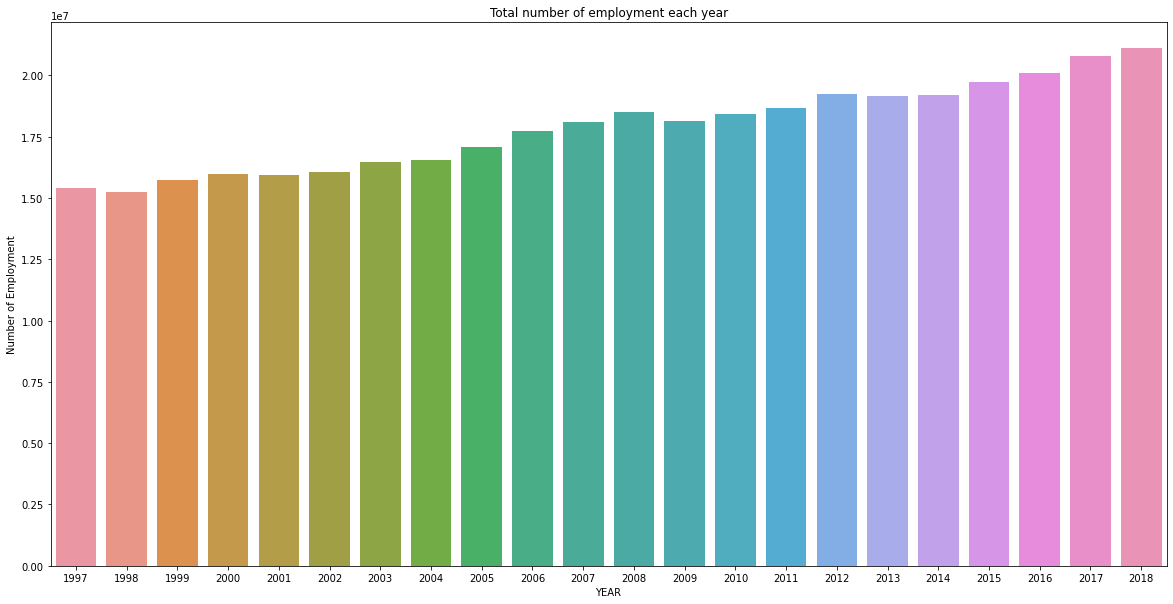

In [29]:
# Now make the plot
final_df5_adj = final_df5.groupby('YEAR')['Employment'].sum()

plt.figure(figsize=(20,10))
sns.barplot(x = final_df5_adj.index , y = final_df5_adj.values)
plt.ylabel('Number of Employment')
plt.title('Total number of employment each year')
plt.show()